# TRACKING CORONA STATE WISE:

In [0]:
# libraries

from datetime import datetime
import os
import re
import glob
import requests 
import pandas as pd
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt

# Web Scrapping: 
All credits to [Devakumar P](https://www.kaggle.com/imdevskp)

In [0]:
# web scrapping

link = 'https://www.mohfw.gov.in/'
req = requests.get(link)
soup = BeautifulSoup(req.content, "html.parser")

thead = soup.find_all('thead')[-1]
# print(thead)
head = thead.find_all('tr')

tbody = soup.find_all('tbody')[-1]
body = tbody.find_all('tr')

# print(rows)

head_rows = []
body_rows = []

for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
    
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
    
# print(head_rows)
    
df_bs = pd.DataFrame(body_rows[:len(body_rows)-2], columns=head_rows[0])
    
df_bs.drop('S. No.', axis=1, inplace=True)
df_bs.head(36)

,Name of State / UT,Total Confirmed cases (Including 70 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andhra Pradesh,305,1,4
1,Andaman and Nicobar Islands,10,0,0
2,Arunachal Pradesh,1,0,0
3,Assam,27,0,0
4,Bihar,38,0,1
5,Chandigarh,18,7,0
6,Chhattisgarh,10,9,0
7,Delhi,576,21,9
8,Goa,7,0,0
9,Gujarat,165,25,13



## Data Cleaning

In [0]:
# date-time information
# ---------------------

now  = datetime.now()
df_bs['Date'] = now.strftime("%m/%d/%Y") 
df_bs['Date'] = pd.to_datetime(df_bs['Date'], format='%m/%d/%Y')
df_bs.head(36)

,Name of State / UT,Total Confirmed cases (Including 70 foreign Nationals),Cured/Discharged/Migrated,Death,Date
0,Andhra Pradesh,305,1,4,2020-04-08
1,Andaman and Nicobar Islands,10,0,0,2020-04-08
2,Arunachal Pradesh,1,0,0,2020-04-08
3,Assam,27,0,0,2020-04-08
4,Bihar,38,0,1,2020-04-08
5,Chandigarh,18,7,0,2020-04-08
6,Chhattisgarh,10,9,0,2020-04-08
7,Delhi,576,21,9,2020-04-08
8,Goa,7,0,0,2020-04-08
9,Gujarat,165,25,13,2020-04-08


In [0]:
df_bs['Name of State / UT'].unique()

array(['Andhra Pradesh', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [0]:
# latitude and longitude information
# ----------------------------------

lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408}

long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882}

df_bs['Latitude'] = df_bs['Name of State / UT'].map(lat)
df_bs['Longitude'] = df_bs['Name of State / UT'].map(long)

df_bs.head(36)

,Name of State / UT,Total Confirmed cases (Including 70 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude
0,Andhra Pradesh,305,1,4,2020-04-08,15.9129,79.7400
1,Andaman and Nicobar Islands,10,0,0,2020-04-08,11.7401,92.6586
2,Arunachal Pradesh,1,0,0,2020-04-08,28.2180,94.7278
3,Assam,27,0,0,2020-04-08,26.2006,92.9376
4,Bihar,38,0,1,2020-04-08,25.0961,85.3131
5,Chandigarh,18,7,0,2020-04-08,30.7333,76.7794
6,Chhattisgarh,10,9,0,2020-04-08,21.2787,81.8661
7,Delhi,576,21,9,2020-04-08,28.7041,77.1025
8,Goa,7,0,0,2020-04-08,15.2993,74.1240
9,Gujarat,165,25,13,2020-04-08,22.2587,71.1924


In [0]:
df_bs.isna().sum()

Name of State / UT                                         0
Total Confirmed cases (Including 70 foreign Nationals)     0
Cured/Discharged/Migrated                                  0
Death                                                      0
Date                                                       0
Latitude                                                   0
Longitude                                                  0
dtype: int64

## Saving data

In [0]:
# saving data
# -----------

file_name = now.strftime("%Y_%m_%d")+'.csv'
df_bs.to_csv(file_name, index=False)

df_bs.head(36)

,Name of State / UT,Total Confirmed cases (Including 70 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude
0,Andhra Pradesh,305,1,4,2020-04-08,15.9129,79.7400
1,Andaman and Nicobar Islands,10,0,0,2020-04-08,11.7401,92.6586
2,Arunachal Pradesh,1,0,0,2020-04-08,28.2180,94.7278
3,Assam,27,0,0,2020-04-08,26.2006,92.9376
4,Bihar,38,0,1,2020-04-08,25.0961,85.3131
5,Chandigarh,18,7,0,2020-04-08,30.7333,76.7794
6,Chhattisgarh,10,9,0,2020-04-08,21.2787,81.8661
7,Delhi,576,21,9,2020-04-08,28.7041,77.1025
8,Goa,7,0,0,2020-04-08,15.2993,74.1240
9,Gujarat,165,25,13,2020-04-08,22.2587,71.1924


In [0]:
df_bs.columns

Index(['Name of State / UT',
       'Total Confirmed cases (Including 70 foreign Nationals) ',
       'Cured/Discharged/Migrated', 'Death', 'Date', 'Latitude', 'Longitude'],
      dtype='object')

# Updating Dataset

In [0]:
df_bs.tail()

,Name of State / UT,Total Confirmed cases (Including 70 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude
26,Telengana,364,35,7,2020-04-08,18.1124,79.0193
27,Tripura,1,0,0,2020-04-08,23.9408,91.9882
28,Uttarakhand,31,5,0,2020-04-08,30.0668,79.0193
29,Uttar Pradesh,326,21,3,2020-04-08,26.8467,80.9462
30,West Bengal,99,13,5,2020-04-08,22.9868,87.8550


In [0]:
df_bs = df_bs.rename(columns={'Cured':'Cured/Discharged'})
df_bs = df_bs.rename(columns={'Cured/Discharged':'Cured/Discharged/Migrated', 
                                      'Total Confirmed cases *': 'Total Confirmed cases', 
                                      'Total Confirmed cases ': 'Total Confirmed cases'})
df_bs = df_bs.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .. foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_bs.head()

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Death,Date,Latitude,Longitude
0,Andhra Pradesh,305,1,4,2020-04-08,15.9129,79.7400
1,Andaman and Nicobar Islands,10,0,0,2020-04-08,11.7401,92.6586
2,Arunachal Pradesh,1,0,0,2020-04-08,28.2180,94.7278
3,Assam,27,0,0,2020-04-08,26.2006,92.9376
4,Bihar,38,0,1,2020-04-08,25.0961,85.3131


In [0]:

df_bs['Date'] = pd.to_datetime(df_bs['Date'])
df_bs = df_bs.sort_values(['Date', 'Name of State / UT']).reset_index(drop=True)

cols = ['Total Confirmed cases','Cured/Discharged/Migrated', 'Death','Latitude','Longitude']
# complete_data['Death'] = complete_data['Death'].str.extract('(\d+)')
df_bs[cols] = df_bs[cols].fillna(0).astype('int')
df_bs['Name of State / UT'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_bs['Name of State / UT'].replace('Pondicherry', 'Puducherry', inplace=True) 

df_bs

In [0]:
yest = pd.read_csv('/content/drive/My Drive/DataScience/complete.csv')
yest = yest[['Date','Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated','Death','Latitude','Longitude']]
yest.tail()

,Date,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Death,Latitude,Longitude
728,2020-04-07,Telengana,321,34,7,18.1124,79.0193
729,2020-04-07,Tripura,1,0,0,23.9408,91.9882
730,2020-04-07,Uttar Pradesh,305,21,3,26.8467,80.9462
731,2020-04-07,Uttarakhand,31,5,0,30.0668,79.0193
732,2020-04-07,West Bengal,91,13,3,22.9868,87.8550


In [0]:
df_bs = df_bs[['Date','Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated','Death','Latitude','Longitude']]

In [0]:
df_bs.head()

,Date,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Death,Latitude,Longitude
0,2020-04-08,Andaman and Nicobar Islands,10,0,0,11,92
1,2020-04-08,Andhra Pradesh,305,1,4,15,79
2,2020-04-08,Arunachal Pradesh,1,0,0,28,94
3,2020-04-08,Assam,27,0,0,26,92
4,2020-04-08,Bihar,38,0,1,25,85


In [0]:
yest['Name of State / UT'].replace('Union Territory of Ladakh', 'Ladakh', inplace=True)
yest['Name of State / UT'].replace('Union Territory of Jammu and Kashmir', 'Jammu and Kashmir', inplace=True)
yest['Name of State / UT'].replace('Union Territory of Chandigarh', 'Chandigarh', inplace=True)

In [0]:
sorted(yest['Name of State / UT'].unique()) == sorted(df_bs['Name of State / UT'].unique())

True

In [0]:
yest.columns == df_bs.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [0]:
latest_df = yest.append(df_bs,ignore_index=True)
latest_df['Date'] = [str(i)[0:10] for i in latest_df.Date]
latest_df.set_index('Date',inplace=True)
latest_df.tail(31)

,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Death,Latitude,Longitude
Date,,,,,,
2020-04-08,Andaman and Nicobar Islands,10,0,0,11.0,92.0
2020-04-08,Andhra Pradesh,305,1,4,15.0,79.0
2020-04-08,Arunachal Pradesh,1,0,0,28.0,94.0
2020-04-08,Assam,27,0,0,26.0,92.0
2020-04-08,Bihar,38,0,1,25.0,85.0
2020-04-08,Chandigarh,18,7,0,30.0,76.0
2020-04-08,Chhattisgarh,10,9,0,21.0,81.0
2020-04-08,Delhi,576,21,9,28.0,77.0
2020-04-08,Goa,7,0,0,15.0,74.0




# DATA PREPARATION:

In [0]:
latest_df['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Karnataka',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura'], dtype=object)

In [0]:
d = {}
  
for state in latest_df['Name of State / UT'].unique():
  fil = (latest_df['Name of State / UT']== state)
  
  temp = latest_df[fil]
 # temp['Days from first case'] = np.arange(1,temp.shape[0]+1)
 # temp.set_index('Days from first case',inplace=True)

  d[state] = pd.DataFrame(temp['Total Confirmed cases'])
  d[state].columns=[state]

In [0]:
def multi_df_join(df_dict):
    df = None
    for suffix, input_df in df_dict.items():
        # join columns
        if df is None:
            df = input_df
        else:
            df = df.join(input_df, how='outer')
    return df

In [0]:
conf_df = multi_df_join(d)

In [0]:
states_to_track = ['Telengana','Maharashtra','Delhi','Gujarat','Haryana','Karnataka','Uttar Pradesh','Jammu and Kashmir','Andhra Pradesh','Madhya Pradesh','Rajasthan','Tamil Nadu','Kerala']
conf_df=conf_df[states_to_track]
conf_df.tail()

,Telengana,Maharashtra,Delhi,Gujarat,Haryana,Karnataka,Uttar Pradesh,Jammu and Kashmir,Andhra Pradesh,Madhya Pradesh,Rajasthan,Tamil Nadu,Kerala
Date,,,,,,,,,,,,,
2020-04-04,158.0,423.0,386.0,95.0,49.0,128.0,174.0,75.0,161.0,104.0,179.0,411.0,295
2020-04-05,269.0,490.0,445.0,105.0,49.0,144.0,227.0,92.0,161.0,104.0,200.0,485.0,306
2020-04-06,321.0,690.0,503.0,122.0,84.0,151.0,227.0,106.0,226.0,165.0,253.0,571.0,314
2020-04-07,321.0,748.0,523.0,144.0,90.0,151.0,305.0,109.0,266.0,165.0,288.0,621.0,327
2020-04-08,364.0,1018.0,576.0,165.0,147.0,175.0,326.0,116.0,305.0,229.0,328.0,690.0,336


In [0]:
conf_df_log = np.log2(conf_df)
conf_df_log.tail(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


,Telengana,Maharashtra,Delhi,Gujarat,Haryana,Karnataka,Uttar Pradesh,Jammu and Kashmir,Andhra Pradesh,Madhya Pradesh,Rajasthan,Tamil Nadu,Kerala
Date,,,,,,,,,,,,,
2020-03-30,6.108524,7.592457,5.727920,5.857981,5.044394,6.321928,6.228819,4.954196,4.247928,5.044394,5.832890,5.643856,7.599913
2020-03-31,6.303781,7.754888,6.599913,6.189825,5.321928,6.375039,6.658211,5.754888,5.321928,5.554589,6.209453,6.209453,7.870365
2020-04-01,6.584963,8.238405,7.247928,6.357552,5.426265,6.658211,6.686501,5.954196,6.375039,6.044394,6.539159,7.870365,7.912889
2020-04-02,6.584963,8.388017,7.247928,6.357552,5.426265,6.781360,6.820179,5.954196,6.426265,6.629357,6.754888,7.870365,8.049849
2020-04-03,6.741467,8.388017,7.774787,6.442943,5.426265,6.954196,6.820179,6.129283,7.044394,6.629357,7.055282,8.271463,8.159871
2020-04-04,7.303781,8.724514,8.592457,6.569856,5.614710,7.000000,7.442943,6.228819,7.330917,6.700440,7.483816,8.682995,8.204571
2020-04-05,8.071462,8.936638,8.797662,6.714246,5.614710,7.169925,7.826548,6.523562,7.330917,6.700440,7.643856,8.921841,8.257388
2020-04-06,8.326429,9.430453,8.974415,6.930737,6.392317,7.238405,7.826548,6.727920,7.820179,7.366322,7.982994,9.157347,8.294621
2020-04-07,8.326429,9.546894,9.030667,7.169925,6.491853,7.238405,8.252665,6.768184,8.055282,7.366322,8.169925,9.278449,8.353147


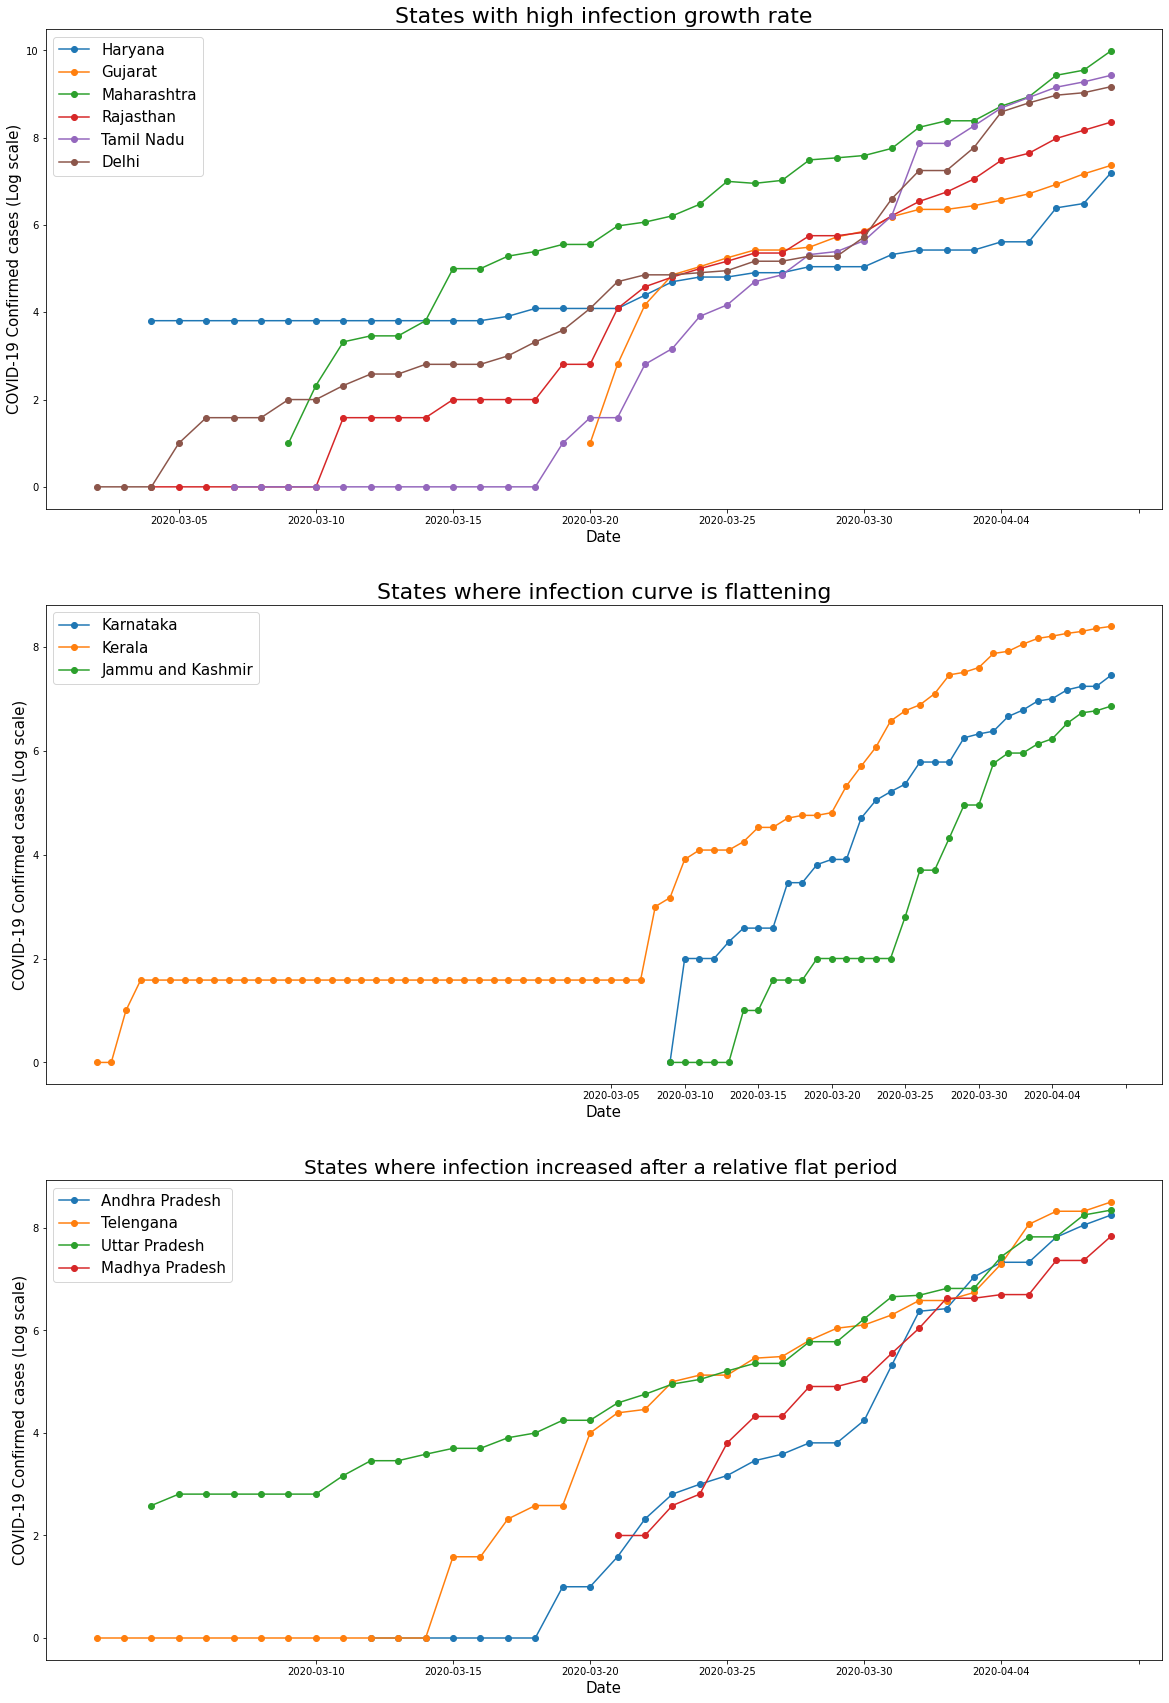

In [0]:
lockdown_needed = ['Haryana','Gujarat','Maharashtra','Rajasthan','Tamil Nadu',"Delhi"]
fig,ax = plt.subplots(3,1,figsize=(20,30))
ax = ax.flatten()
for state in lockdown_needed:
  conf_df_log[state].plot(marker='o',ax=ax[0])
  ax[0].legend(loc="upper left",labels=lockdown_needed,fontsize=15)
  ax[0].set_title("States with high infection growth rate",fontsize=22)
  ax[0].set_xlabel("Date",fontsize=15)
  ax[0].set_ylabel("COVID-19 Confirmed cases (Log scale)",fontsize=15)

near_flat = ['Karnataka','Kerala','Jammu and Kashmir']
for state in near_flat:
  conf_df_log[state].plot(marker='o',ax=ax[1])
  ax[1].legend(loc="upper left",labels=near_flat,fontsize=15)
  ax[1].set_title("States where infection curve is flattening",fontsize=22)
  ax[1].set_xlabel("Date",fontsize=15)
  ax[1].set_ylabel("COVID-19 Confirmed cases (Log scale)",fontsize=15)

wait = ['Andhra Pradesh','Telengana','Uttar Pradesh','Madhya Pradesh']
for state in wait:
  conf_df_log[state].plot(marker='o',ax=ax[2])
  ax[2].legend(loc="upper left",labels=wait,fontsize=15)
  ax[2].set_title("States where infection increased after a relative flat period ",fontsize=20)
  ax[2].set_xlabel("Date",fontsize=15)
  ax[2].set_ylabel("COVID-19 Confirmed cases (Log scale)",fontsize=15)

plt.savefig('COVID19_IndiaStates.png')
  